In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
import random
import plotly.graph_objs as go
import plotly as py
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable = True, theme = 'solar')

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [2]:
df = pd.read_csv('Seattle_Hotels.csv', encoding = "latin-1")

In [3]:
df.head()

,name,address,desc
0,Hilton Garden Seattle Downtown,"1821 Boren Avenue, Seattle Washington 98101 USA","Located on the southern tip of Lake Union, the..."
1,Sheraton Grand Seattle,"1400 6th Avenue, Seattle, Washington 98101 USA","Located in the city's vibrant core, the Sherat..."
2,Crowne Plaza Seattle Downtown,"1113 6th Ave, Seattle, WA 98101","Located in the heart of downtown Seattle, the ..."
3,Kimpton Hotel Monaco Seattle,"1101 4th Ave, Seattle, WA98101",What?s near our hotel downtown Seattle locatio...
4,The Westin Seattle,"1900 5th Avenue, Seattle, Washington 98101 USA",Situated amid incredible shopping and iconic a...


In [4]:
print('We have', len(df), 'hotels in the data')

We have 152 hotels in the data


In [5]:
def print_description(index):
    example = df[df.index == index][['desc', 'name']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Name:', example[1])

In [6]:
print_description(10)

Soak up the vibrant scene in the Living Room Bar and get in the mix with our live music and DJ series before heading to a memorable dinner at TRACE. Offering inspired seasonal fare in an award-winning atmosphere, it's a not-to-be-missed culinary experience in downtown Seattle. Work it all off the next morning at FIT®, our state-of-the-art fitness center before wandering out to explore many of the area's nearby attractions, including Pike Place Market, Pioneer Square and the Seattle Art Museum. As always, we've got you covered during your time at W Seattle with our signature Whatever/Whenever® service - your wish is truly our command.
Name: W Seattle


In [7]:
print_description(100)

On a budget in Seattle or looking for something different? The historic charm and "home away from home" atmosphere of The Baroness will be sure to make you feel like one of the family. Conveniently located on First Hill, we are proud to be part of the Virginia Mason Hospital campus and only minutes from Harborview Medical Center and Swedish Hospital. The Baroness Hotel is a great option for short or long term medical, patient or family stays. Whether you are visiting the area's world-class medical facilities or on a budget vacation, our goal is to ensure a wonderful stay. Guest Amenities: Complimentary Internet access, Two twin, one or two queen studios with mini fridge and microwave, Two twin or one queen suites with full kitchens, Laundry facilities available, Flat screen cable television with HBO, Complimentary local calls, Ice and vending machines located in the lobby, Coffee maker and hairdryers in all guestrooms, Room service available seven days a week from the Rhododendron Cafe

### Visualize Token (vocabulary) Frequency Distribution Before Removing Stop Words

In [8]:
def get_top_n_words(corpus, n = None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
common_words = get_top_n_words(df['desc'], 20)
df1 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
df1.groupby('desc').sum()['count'].sort_values().iplot(kind = 'barh', yTitle = 'Count', linecolor = 'black', title = 'Top 20 words in hotel description before removing stop words')

### Visualize Token (vocabulary) Frequency Distribution After Removing Stop Words

In [9]:
def get_top_n_words(corpus, n = None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
common_words = get_top_n_words(df['desc'], 20)
df2 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
df2.groupby('desc').sum()['count'].sort_values().iplot(kind = 'barh', yTitle = 'Count', linecolor = 'black', title = 'Top 20 words in hotel description after removing stop words')

### Bigrams Frequency Distribution Before Removing Stop Word

In [10]:
def get_top_n_bigram(corpus, n = None):
    vec = CountVectorizer(ngram_range = (2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['desc'], 20)
df3 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
df3.groupby('desc').sum()['count'].sort_values(ascending = False).iplot(kind = 'bar', yTitle = 'Count', linecolor = 'black', title = 'Top 20 bigrams in hotel description before removing stop words')

### Bigrams Frequency Distribution After Removing Stop Word

In [11]:
def get_top_n_bigram(corpus, n = None):
    vec = CountVectorizer(ngram_range = (2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['desc'], 20)
df4 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
df4.groupby('desc').sum()['count'].sort_values(ascending = False).iplot(kind = 'bar', yTitle = 'Count', linecolor = 'black', title = 'Top 20 bigrams in hotel description After removing stop words')

### Trigrams Frequency Distribution Before Removing Stop Word

In [12]:
def get_top_n_trigram(corpus, n = None):
    vec = CountVectorizer(ngram_range = (3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['desc'], 20)
df5 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
df5.groupby('desc').sum()['count'].sort_values(ascending = False).iplot(kind = 'bar', yTitle = 'Count', linecolor = 'black', title = 'Top 20 trigrams in hotel description before removing stop words')

In [13]:
def get_top_n_trigram(corpus, n = None):
    vec = CountVectorizer(ngram_range = (3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['desc'], 20)
df6 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
df6.groupby('desc').sum()['count'].sort_values(ascending = False).iplot(kind = 'bar', yTitle = 'Count', linecolor = 'black', title = 'Top 20 trigrams in hotel description after removing stop words')

### Hotel Description Length Distribution

In [14]:
df['word_count'] = df['desc'].apply(lambda x: len(str(x).split()))

In [15]:
desc_lengths = list(df['word_count'])

print("Number of descriptions:", len(desc_lengths),
      "\nAverage word count", np.average(desc_lengths),
      "\nMinimum word count", min(desc_lengths),
      "\nMaximum word count", max(desc_lengths))

Number of descriptions: 152 
Average word count 156.94736842105263 
Minimum word count 16 
Maximum word count 494


In [16]:
df['word_count'].iplot(
    kind = 'hist',
    bins = 50,
    linecolor = 'black',
    xTitle = 'word count',
    yTitle = 'count',
    title = 'Word Count Distribution in Hotel Description')

The data was collected by myself, so there relatively clean, no extreme outliers.

### Preprocessing hotel description text 

The test is pretty clean, we don't have a lot to do, but just in case.

In [17]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
    
df['desc_clean'] = df['desc'].apply(clean_text)

<>:1: DeprecationWarning:

invalid escape sequence \[

<>:1: DeprecationWarning:

invalid escape sequence \[

C:\Users\91773\AppData\Local\Temp/ipykernel_1784/3514622419.py:1: DeprecationWarning:

invalid escape sequence \[



In [18]:
def print_description(index):
    example = df[df.index == index][['desc_clean', 'name']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Name:', example[1])
print_description(10)

soak vibrant scene living room bar get mix live music dj series heading memorable dinner trace offering inspired seasonal fare awardwinning atmosphere nottobemissed culinary experience downtown seattle work next morning fit stateoftheart fitness center wandering explore many areas nearby attractions including pike place market pioneer square seattle art museum always weve got covered time w seattle signature whatever whenever service wish truly command
Name: W Seattle


In [19]:
print_description(100)

budget seattle looking something different historic charm home away home atmosphere baroness sure make feel like one family conveniently located first hill proud part virginia mason hospital campus minutes harborview medical center swedish hospital baroness hotel great option short long term medical patient family stays whether visiting areas worldclass medical facilities budget vacation goal ensure wonderful stay guest amenities complimentary internet access two twin one two queen studios mini fridge microwave two twin one queen suites full kitchens laundry facilities available flat screen cable television hbo complimentary local calls ice vending machines located lobby coffee maker hairdryers guestrooms room service available seven days week rhododendron cafe limited wheelchair accessibility guest library business center printing fax services available 100 nonsmoking pet free rooms air conditioned fans available selfparking available virginia mason hospital fee
Name: The Baroness Hot

In [20]:
df.set_index('name', inplace = True)

In [21]:
tf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 3), min_df = 0, stop_words = 'english')
tfidf_matrix = tf.fit_transform(df['desc_clean'])
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [22]:
indices = pd.Series(df.index)

In [23]:
indices[:50]

0                        Hilton Garden Seattle Downtown
1                                Sheraton Grand Seattle
2                         Crowne Plaza Seattle Downtown
3                         Kimpton Hotel Monaco Seattle 
4                                    The Westin Seattle
5                           The Paramount Hotel Seattle
6                                        Hilton Seattle
7                                         Motif Seattle
8                                       Warwick Seattle
9                            Four Seasons Hotel Seattle
10                                            W Seattle
11                                   Gand Hyatt Seattle
12                                 Kimpton Alexis Hotel
13                                            Hotel Max
14                                    Ace Hotel Seattle
15                          Seattle Marriott Waterfront
16                          The Edgewater Hotel Seattle
17                   SpringHill Suites Seattle D

In [24]:
def recommendations(name, cosine_similarities = cosine_similarities):
    
    recommended_hotels = []
    
    # gettin the index of the hotel that matches the name
    idx = indices[indices == name].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar hotels except itself
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the names of the top 10 matching hotels
    for i in top_10_indexes:
        recommended_hotels.append(list(df.index)[i])
        
    return recommended_hotels

In [25]:
recommendations('Hilton Seattle Airport & Conference Center')

['Embassy Suites by Hilton Seattle Tacoma International Airport',
 'DoubleTree by Hilton Hotel Seattle Airport',
 'Seattle Airport Marriott',
 'Motel 6 Seattle Sea-Tac Airport South',
 'Econo Lodge SeaTac Airport North',
 'Four Points by Sheraton Downtown Seattle Center',
 'Knights Inn Tukwila',
 'Econo Lodge Renton-Bellevue',
 'Hampton Inn Seattle/Southcenter',
 'Radisson Hotel Seattle Airport']

The following are recommended by Google for "Hilton Seattle Airport & Conference Center":

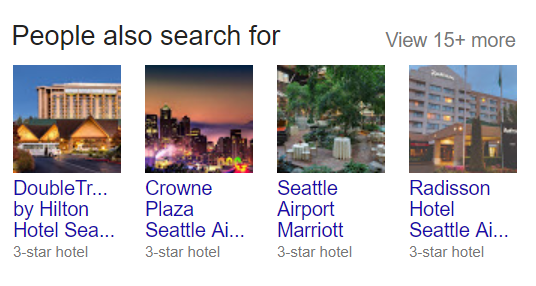

The following are recommended by Tripadvisor for "Hilton Seattle Airport & Conference Center":

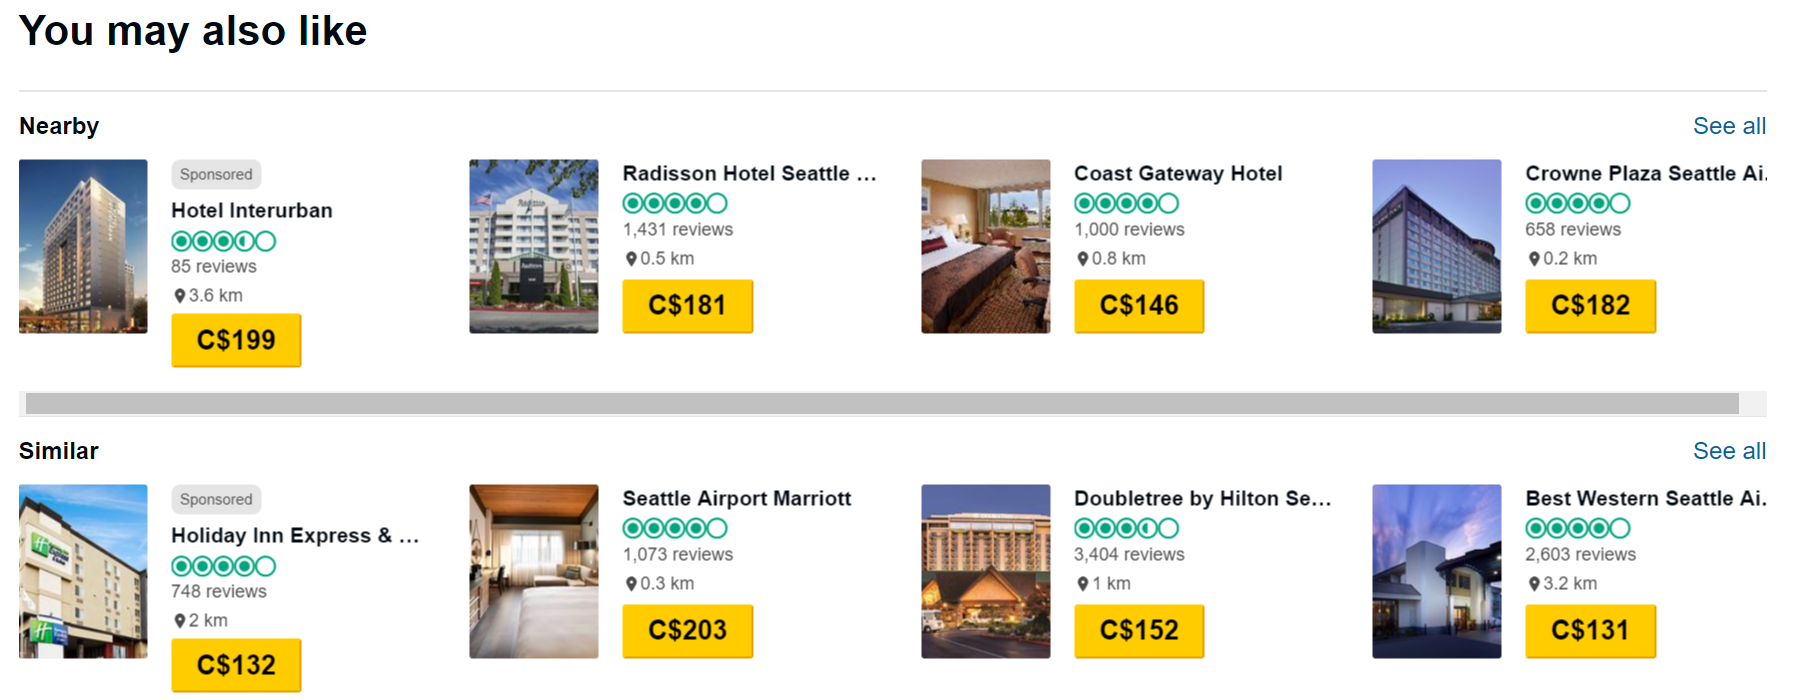

Try a bed and breakfast

In [26]:
recommendations("The Bacon Mansion Bed and Breakfast")

['11th Avenue Inn Bed and Breakfast',
 'Shafer Baillie Mansion Bed & Breakfast',
 'Chittenden House Bed and Breakfast',
 'Gaslight Inn',
 'Bed and Breakfast Inn Seattle',
 'Silver Cloud Hotel - Seattle Broadway',
 'Hyatt House Seattle',
 'Mozart Guest House',
 'Quality Inn & Suites Seattle Center',
 'MarQueen Hotel']

The following are recommended by Google for "The Bacon Mansion Bed and Breakfast":

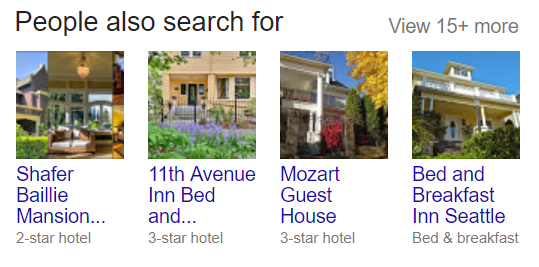

Cool! Almost identical.

The following are recommended by Tripadvisor for "The Bacon Mansion Bed and Breakfast", which I was not impressed.

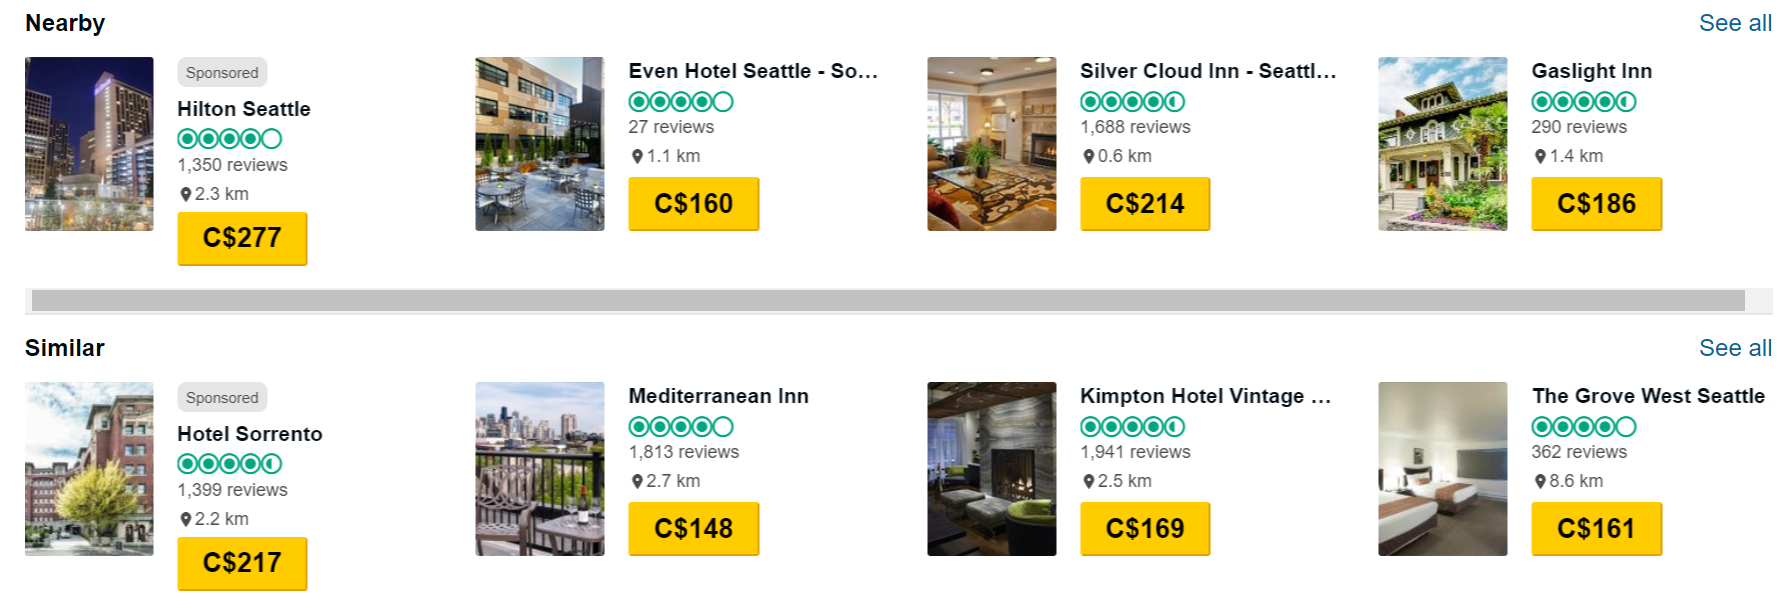